In [9]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 52.9 MB/s 
     |████████████████████████████████| 6.3 MB 37.9 MB/s 


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import requests, zipfile, io
import glob
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

In [3]:
df= pd.read_csv('/content/q1.csv', low_memory=False, error_bad_lines=False)

In [32]:
df.head()

,complflag,geolocation__latitude__s,site_contact_name__c,locationcity__c,work_order__c,internal_notes__c,locationoccupantname__c,service_provider_notes__c,onsiteby__c,locationstate__c,...,impact__c,lastreferenceddate,service_provider_assigned_to_site__c,service_provider__c,casesafeid_id__c,corrigo_search_result__c,case_age_in_minutes__c,service_provider_time_minutes__c,comments,dispatch_method__c
0,Non-Complaint,41.029165,Danilsa Torres,White Plains,WBS14500514,NTE: $500.00 (NTE amount is inclusive of taxes...,00545 - White Plains,Small planter at entrance: please replace dead...,NaN,NY,...,Minor,NaN,NaN,NaN,5008M000001SdMpQAK,a3Z8M0000008RpoUAE,8625.0,NaN,NaN,Phone & Text
1,Non-Complaint,NaN,NaN,NaN,NaN,NaN,NaN,Site requesting Plow and Deicing of parking lo...,NaN,NaN,...,Minor,NaN,NaN,NaN,5005G00000cpuDpQAI,NaN,82.0,NaN,NaN,Phone & Text
2,Complaint,40.728652,Marcia McFarlane,Floral Park,WBS34400073,NTE: $0.00 (NTE amount is inclusive of taxes)\...,71644 - Floral Park,Customers complaining about the plants are dea...,NaN,NY,...,Minor,NaN,NaN,NaN,5008M000001SdTNQA0,a3Z8M0000008RptUAE,4727.0,NaN,NaN,Phone & Text
3,Non-Complaint,NaN,NaN,NaN,NaN,NaN,NaN,Please plow and de-ice parking lot,NaN,NaN,...,Minor,NaN,NaN,NaN,5005G00000yiQmXQAU,NaN,80.0,NaN,NaN,Phone & Text
4,Non-Complaint,42.201532,NaN,Weymouth,NGG04100003,NTE: $323.34 (NTE amount is inclusive of taxes...,WEYMOUTH,April Monthly Landscaping/Grounds Services,NaN,MA,...,Minor,NaN,NaN,NaN,5008M000000h9yaQAA,a3Z8M0000008PqTUAU,54658.0,NaN,NaN,Phone & Text


In [8]:
df.columns.tolist()

['complflag',
 'geolocation__latitude__s',
 'site_contact_name__c',
 'locationcity__c',
 'work_order__c',
 'internal_notes__c',
 'locationoccupantname__c',
 'service_provider_notes__c',
 'onsiteby__c',
 'locationstate__c',
 'external_asset__c',
 'completion_comment__c',
 'locationspacename__c',
 'accountid',
 'sla_priority__c',
 'ivrcomment__c',
 'locationstreet2__c',
 'external_task__c',
 'due_date__c',
 'geolocation__longitude__s',
 'locationstreet__c',
 'subject',
 'site_contact_phone__c',
 'completion_status__c',
 'ownerid',
 'isdeleted',
 'systemmodstamp',
 'acknowledgeby__c',
 'status',
 'completion_date__c',
 'case_nte__c',
 'contactinfo__c',
 'ivrnumber__c',
 'locationoccupantid__c',
 'createddate',
 'locationspaceid__c',
 'locationzip__c',
 'work_category__c',
 'customer_name__c',
 'service_provider_date_scheduled_time__c',
 'externalcreateddate__c',
 'upsertid__c',
 'externallastupdate__c',
 'work_type__c',
 'service_category__c',
 'workzonenumber__c',
 'site_contact_email__c

In [90]:
df.service_provider_phone_formatted_c

AttributeError: ignored

In [25]:
pd.crosstab(df.service_category__c, df.complflag)

complflag,Complaint,Non-Complaint
service_category__c,,
Business,1,1453
Janitorial,7,70
Landscape service,83,11031
Snow and Ice,148,41033
String14,0,5
Sweeping,0,7


In [24]:
pd.crosstab(df.complflag, df.service_category__c.map({'Snow and Ice': 'Snow and Ice'}).fillna('Everything Else'))

service_category__c,Everything Else,Snow and Ice
complflag,,
Complaint,91,148
Non-Complaint,12635,41033


In [62]:
df['SrvcFlag']=df.service_category__c.map({'Snow and Ice': 'Snow and Ice'}).fillna('Everything Else')

In [45]:
df['compflag_num']= df.complflag.map({'Complaint':1, 'Non-Complaint':0})

In [63]:
df1= df[['geolocation__latitude__s', 'geolocation__longitude__s', 'locationstate__c','SrvcFlag', 'complflag', 'compflag_num']].dropna()

In [66]:
df1.groupby(['locationstate__c','SrvcFlag'])['compflag_num'].agg([sum, 'size']).reset_index().pivot(index= 'locationstate__c', columns= 'SrvcFlag').fillna(0)

sum                         size             
SrvcFlag         Everything Else Snow and Ice Everything Else Snow and Ice
locationstate__c                                                          
AK                           0.0          0.0             2.0         22.0
AL                           0.0          0.0             1.0          0.0
AR                           0.0          0.0             1.0          0.0
AZ                           0.0          0.0            13.0          0.0
CA                           0.0          0.0           239.0          2.0
CO                           0.0          0.0           160.0         24.0
CT                          11.0          0.0           486.0        303.0
DC                           0.0          0.0             0.0         10.0
DE                           0.0          0.0            17.0         12.0
FL                           0.0          0.0           314.0          0.0
GA                           0.0          0.0           110.0          0.0
IA                           0.0          0.0            31.0         40.0
ID                           0.0          0.0             0.0         12.0
IL                           0.0          0.0            71.0        185.0
IN                           0.0          0.0             0.0         34.0
KS                           0.0          0.0             3.0         23.0
KY                           0.0          0.0             0.0          3.0
LA                           0.0          0.0            24.0          0.0
MA                           6.0          4.0          1169.0        393.0
MD                           0.0          0.0           178.0         95.0
ME                           0.0          0.0           105.0         53.0
MI                           0.0          0.0            80.0         47.0
MN                           0.0          0.0            11.0         27.0
MO                           0.0          0.0             5.0         50.0
MS                           0.0          0.0             6.0          0.0
MT                           0.0          0.0             3.0         34.0
NC                           0.0          0.0           102.0         32.0
ND                           0.0          0.0             0.0         10.0
NE                           0.0          0.0            20.0          0.0
NH                           0.0          0.0           113.0         38.0
NJ                           0.0          0.0           213.0        287.0
NM                           0.0          0.0             0.0         37.0
NV                           0.0          0.0             0.0          7.0
NY                           8.0          1.0           621.0        405.0
OH                           0.0          0.0            32.0         48.0
OK                           0.0          0.0            21.0          2.0
OR                           0.0          0.0            35.0         10.0
PA                           1.0          0.0           255.0        155.0
RI                           3.0          0.0           170.0         53.0
SC                           0.0          0.0           136.0          2.0
SD                           0.0          0.0             4.0          1.0
TN                           0.0          0.0            38.0          2.0
TX                           0.0          0.0           186.0          0.0
UT                           0.0          0.0             0.0          8.0
VA                           0.0          0.0           134.0         51.0
VT                           0.0          0.0             6.0          8.0
WA                           0.0          0.0           103.0         29.0
WI                           0.0          0.0            35.0         12.0
WV                           0.0          0.0             0.0          8.0

In [68]:
df.head()

,complflag,geolocation__latitude__s,site_contact_name__c,locationcity__c,work_order__c,internal_notes__c,locationoccupantname__c,service_provider_notes__c,onsiteby__c,locationstate__c,...,service_provider_assigned_to_site__c,service_provider__c,casesafeid_id__c,corrigo_search_result__c,case_age_in_minutes__c,service_provider_time_minutes__c,comments,dispatch_method__c,compflag_num,SrvcFlag
0,Non-Complaint,41.029165,Danilsa Torres,White Plains,WBS14500514,NTE: $500.00 (NTE amount is inclusive of taxes...,00545 - White Plains,Small planter at entrance: please replace dead...,NaN,NY,...,NaN,NaN,5008M000001SdMpQAK,a3Z8M0000008RpoUAE,8625.0,NaN,NaN,Phone & Text,0,Everything Else
1,Non-Complaint,NaN,NaN,NaN,NaN,NaN,NaN,Site requesting Plow and Deicing of parking lo...,NaN,NaN,...,NaN,NaN,5005G00000cpuDpQAI,NaN,82.0,NaN,NaN,Phone & Text,0,Snow and Ice
2,Complaint,40.728652,Marcia McFarlane,Floral Park,WBS34400073,NTE: $0.00 (NTE amount is inclusive of taxes)\...,71644 - Floral Park,Customers complaining about the plants are dea...,NaN,NY,...,NaN,NaN,5008M000001SdTNQA0,a3Z8M0000008RptUAE,4727.0,NaN,NaN,Phone & Text,1,Everything Else
3,Non-Complaint,NaN,NaN,NaN,NaN,NaN,NaN,Please plow and de-ice parking lot,NaN,NaN,...,NaN,NaN,5005G00000yiQmXQAU,NaN,80.0,NaN,NaN,Phone & Text,0,Snow and Ice
4,Non-Complaint,42.201532,NaN,Weymouth,NGG04100003,NTE: $323.34 (NTE amount is inclusive of taxes...,WEYMOUTH,April Monthly Landscaping/Grounds Services,NaN,MA,...,NaN,NaN,5008M000000h9yaQAA,a3Z8M0000008PqTUAU,54658.0,NaN,NaN,Phone & Text,0,Everything Else


'case_age_in_minutes__c',
 'service_provider_time_minutes__c'

In [71]:
df[['SrvcFlag', 'complflag', 'case_age_in_minutes__c',  'service_provider_time_minutes__c']].isnull().sum()

SrvcFlag                                0
complflag                               0
case_age_in_minutes__c                 49
service_provider_time_minutes__c    53905
dtype: int64

In [76]:
df.case_age_in_minutes__c.describe()

count     53858.000000
mean      37112.129024
std       64655.336624
min           0.000000
25%         105.000000
50%         847.000000
75%       48987.500000
max      859934.000000
Name: case_age_in_minutes__c, dtype: float64

In [80]:
p25=df.case_age_in_minutes__c.describe(percentiles=[.05,.25,.50,.75,.95]).loc['25%']
p75= df.case_age_in_minutes__c.describe(percentiles=[.05,.25,.50,.75,.95]).loc['75%']

In [84]:
df["case_age_in_minutes__c"] = np.where(df["case_age_in_minutes__c"] <p25, p25,df['case_age_in_minutes__c'])
df["case_age_in_minutes__c"] = np.where(df["case_age_in_minutes__c"] >p75, p75,df['case_age_in_minutes__c'])

In [89]:
df.groupby('SrvcFlag')['case_age_in_minutes__c'].describe()[['25%', '75%']]

,25%,75%
SrvcFlag,,
Everything Else,18612.0,48987.5
Snow and Ice,105.0,14073.0


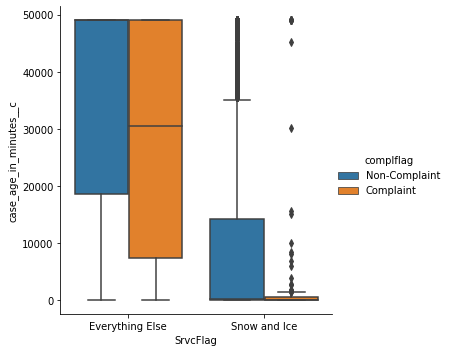

In [85]:
sns.catplot(x="SrvcFlag", y= 'case_age_in_minutes__c', hue= 'complflag', kind="box", data=df)